## Toque experiments

In these simulations, I used a "mutant lexicon", which is an average of the speaker and addressee lexicons.

In [1]:
# Initialize agents

import model
import visualizations

lambda_val = 1
pragmatic_weight = 1
pref_weight = 1
length_cost_smoothing = 1
speaker_weight = 0.5

can_agent = model.Agent("CAN",
    lambda_param=lambda_val,
    pref_weight=pref_weight,
    pragmatic_weight=pragmatic_weight,
    length_cost_smoothing=length_cost_smoothing,
    speaker_weight=speaker_weight)
us_agent = model.Agent("US",
    lambda_param=lambda_val,
    pref_weight=pref_weight,
    pragmatic_weight=pragmatic_weight,
    length_cost_smoothing=length_cost_smoothing,
    speaker_weight=speaker_weight)
uk_agent = model.Agent("UK",
    lambda_param=lambda_val,
    pref_weight=pref_weight,
    pragmatic_weight=pragmatic_weight,
    length_cost_smoothing=length_cost_smoothing,
    speaker_weight=speaker_weight)

can -> us ['BANANA', 'LAMP', 'PEN'] {'banana': 1.0}


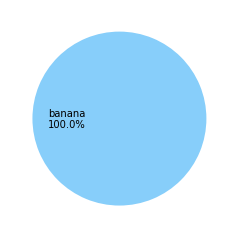

can -> us ['SODAPOP', 'LAMP', 'PEN'] {'soda': 0.5, 'pop': 0.5}


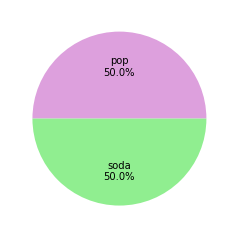

can -> can ['SODAPOP', 'LAMP', 'PEN'] {'soda': 0.009900990099009905, 'pop': 0.9900990099009901}


In [30]:
# With/without variation in preferred term

context_no_mismatch = ["BANANA", "LAMP", "PEN"]
context_mismatch = ["SODAPOP", "LAMP", "PEN"]

no_mismatch_result = can_agent.produce_matrix_mutant(context_no_mismatch, us_agent)
print("can -> us", context_no_mismatch, no_mismatch_result)
visualizations.make_pie_plot(no_mismatch_result)

mismatch_result = can_agent.produce_matrix_mutant(context_mismatch, us_agent)
print("can -> us", context_mismatch, mismatch_result)
visualizations.make_pie_plot(mismatch_result)

print("can -> can", context_mismatch, can_agent.produce_matrix_mutant(context_mismatch, can_agent))


can -> uk ['CRISPS', 'PEN', 'BANANA'] {'chips': 0.5, 'crisps': 0.5}


/home/jreneewatson/vocabulary-mismatch-model/model.py:77: RuntimeWarning: divide by zero encountered in log
  np.log(combined_listener[w, o]), np.NaN)
/home/jreneewatson/vocabulary-mismatch-model/model.py:84: RuntimeWarning: divide by zero encountered in log
  np.log(utility_prefer),


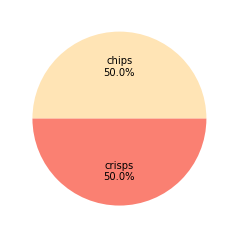

can -> uk ['CRISPS', 'FRIES', 'BANANA'] {'chips': 0.3333333333333333, 'crisps': 0.6666666666666666}


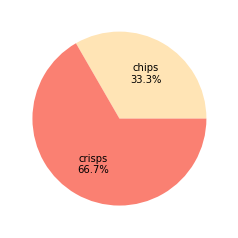

can -> uk ['FRIES', 'PEN', 'BANANA'] {'fries': 0.5, 'chips': 0.5}

can -> uk ['FRIES', 'CRISPS', 'BANANA'] {'fries': 0.6666666666666666, 'chips': 0.3333333333333333}
can -> can ['FRIES', 'CRISPS', 'BANANA'] {'fries': 1.0}

can -> uk ['CRISPS', 'PEN', 'BANANA'] {'chips': 0.5, 'crisps': 0.5}

can -> uk ['CRISPS', 'FRIES', 'BANANA'] {'chips': 0.3333333333333333, 'crisps': 0.6666666666666666}
can -> can ['CRISPS', 'FRIES', 'BANANA'] {'chips': 1.0}


In [2]:
# Ambiguity case -- based simply on literal listener

context_no_ambiguity = ["FRIES", "PEN", "BANANA"]
context_no_ambiguity2 = ["CRISPS", "PEN", "BANANA"]
context_ambiguity = ["FRIES", "CRISPS", "BANANA"]
context_ambiguity2 = ["CRISPS", "FRIES", "BANANA"]


no_ambiguity_result = can_agent.produce_matrix_mutant(context_no_ambiguity2, uk_agent)
print("can -> uk", context_no_ambiguity2, no_ambiguity_result)
visualizations.make_pie_plot(no_ambiguity_result)

ambiguity_result = can_agent.produce_matrix_mutant(context_ambiguity2, uk_agent)
print("can -> uk", context_ambiguity2, ambiguity_result)
visualizations.make_pie_plot(ambiguity_result)


print("can -> uk", context_no_ambiguity, can_agent.produce_matrix_mutant(context_no_ambiguity, uk_agent))
print("\ncan -> uk", context_ambiguity, can_agent.produce_matrix_mutant(context_ambiguity, uk_agent))
print("can -> can", context_ambiguity, can_agent.produce_matrix_mutant(context_ambiguity, can_agent))
print("\ncan -> uk", context_no_ambiguity2, can_agent.produce_matrix_mutant(context_no_ambiguity2, uk_agent))
print("\ncan -> uk", context_ambiguity2, can_agent.produce_matrix_mutant(context_ambiguity2, uk_agent))
print("can -> can", context_ambiguity2, can_agent.produce_matrix_mutant(context_ambiguity2, can_agent))


can -> us ['TOQUE', 'CAP', 'PEN'] {'toque': 0.3333333333333333, 'hat': 0.3333333333333333, 'winter_hat': 0.3333333333333333}


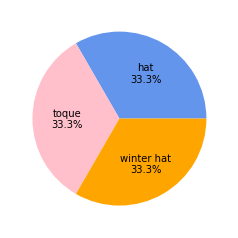

can -> us ['CAP', 'TOQUE', 'PEN'] {'hat': 0.3333333333333333, 'cap': 0.6666666666666666}


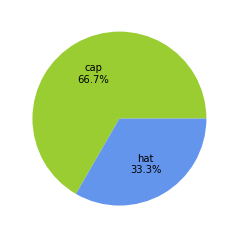

In [34]:
# Variety-specific lexical gaps

context_with_gap = ["TOQUE", "CAP", "PEN"]
context_with_gap_no_ambig = ["CAP", "TOQUE", "PEN"]

gap_result = can_agent.produce_matrix_mutant(context_with_gap, us_agent, length_cost=True)
print("can -> us", context_with_gap, gap_result)
visualizations.make_pie_plot(gap_result)

no_ambig_result = can_agent.produce_matrix_mutant(context_with_gap_no_ambig, us_agent, length_cost=True)
print("can -> us", context_with_gap_no_ambig, no_ambig_result)
visualizations.make_pie_plot(no_ambig_result)


# print("can -> us", context_with_gap, can_agent.produce_matrix(context_with_gap, us_agent))
# print("can -> can", context_with_gap, can_agent.produce_matrix(context_with_gap, can_agent))

# print("\n\n")
# print("can -> us", context_with_gap, can_agent.produce_matrix(context_with_gap, us_agent, length_cost=True))
# print("can -> can", context_with_gap, can_agent.produce_matrix(context_with_gap, can_agent, length_cost=True))
